## Génération de figures pour le chapitre « Généralisation ».

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [40]:
plt.rc('font', **{'family':'sans', 'size': 24})

matplotlib.rcParams.update({
    'text.usetex': True,
    'text.latex.preamble': [r'\usepackage{mathptmx}',r'\usepackage{amsmath}', r'\usepackage{amssymb}',]})

In [3]:
prop_cycle = plt.rcParams['axes.prop_cycle']
def_colors = prop_cycle.by_key()['color']

## Overfitting (classification)

In [15]:
X = np.loadtxt('classif_X.csv')
y = np.loadtxt('classif_y.csv')

In [16]:
pos = np.where(y>0)[0]
neg = np.where(y<=0)[0]

In [7]:
from sklearn import svm

In [8]:
clf = svm.SVC(kernel = 'rbf',  gamma=2.7, C=10.)
clf.fit(X, y)

h = .01  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

In [9]:
clf2 = svm.SVC(kernel = 'rbf',  gamma=.1, C=10.)
clf2.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z2 = clf2.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z2 = Z2.reshape(xx.shape)

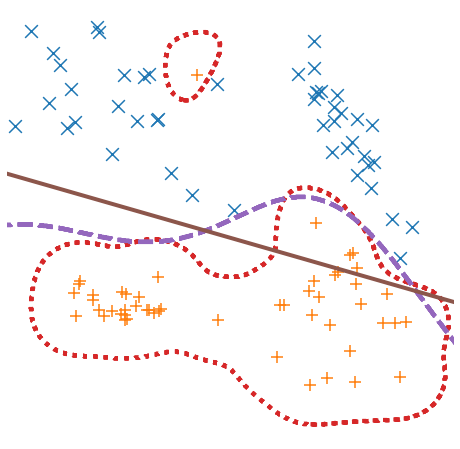

In [36]:
fig = plt.figure(figsize=(8, 8))
plt.scatter(X[pos, 0], X[pos, 1], marker='x', s=162)
plt.scatter(X[neg, 0], X[neg, 1], marker='+', s=162)

plt.plot([-5, 4.5], [1, -2], "-", lw=4, color=def_colors[5]) 
plt.contour(xx, yy, Z, linewidths=4, linestyles=":", colors=def_colors[3])
plt.contour(xx, yy, Z2, linewidths=4, linestyles="--", colors=def_colors[4])

#sepx = np.array([-5, -3, -1.5, -1, -0.5, 0, 0.4, -0.8, -1, -0.6, -0.5, -0.45, 2, 4])
#sepy = np.array([2, 1, 0.5, 0, 0, -0.4, 0, 1.5, 3, 3.2, 3, 2.3, 0, -2])
#plt.plot(sepx, sepy, "-.", lw=3, color=def_colors[4]) 

plt.xlim([-4.2, 4.2])
plt.ylim([-4.8, 4.2])
plt.axis('off')

plt.savefig('../poly/figures/generalisation/overfit_class.pdf', bbox_inches='tight')

## Overfitting (régression)

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, LinearRegression

In [38]:
xvals = np.linspace(-3, 3, 100)
#keep = range(100)
#rng = np.random.RandomState(1)
#rng.shuffle(keep)
#xvals_tr = np.sort(xvals[keep[:20]])
#print keep[:20]
#yvals_tr = 0.5 + 0.1*xvals_tr - 0.6*xvals_tr**2 - 0.5*xvals_tr**3 + 2.*rng.rand(20)

xvals_tr = np.random.sample(size=(20, ))*6.-3.

yvals_tr = 0.5 + 0.1*xvals_tr - 0.6*xvals_tr**2 - 0.5*xvals_tr**3 + \
    0.3*np.random.normal(size=(20, ))

In [39]:
# Linear
model_1 = Ridge()
model_1.fit(xvals_tr.reshape(-1, 1), yvals_tr)
yvals_1 = model_1.predict(xvals.reshape(-1, 1))


# Quadratic
poly = PolynomialFeatures(degree=2)
xvals_tr2 = poly.fit_transform(xvals_tr.reshape(-1, 1))
xvals_2 = poly.fit_transform(xvals.reshape(-1, 1))

model_2 = Ridge()
model_2.fit(xvals_tr2, yvals_tr)
yvals_2 = model_2.predict(xvals_2)


# Degree 3
poly = PolynomialFeatures(degree=3)
xvals_tr3 = poly.fit_transform(xvals_tr.reshape(-1, 1))
xvals_3 = poly.fit_transform(xvals.reshape(-1, 1))

model_3 = LinearRegression()
model_3.fit(xvals_tr3, yvals_tr)
yvals_3 = model_3.predict(xvals_3)


# Degree 13
poly = PolynomialFeatures(degree=13)
xvals_tr13 = poly.fit_transform(xvals_tr.reshape(-1, 1))
xvals_13 = poly.fit_transform(xvals.reshape(-1, 1))

model_13 = LinearRegression()
model_13.fit(xvals_tr13, yvals_tr)
yvals_13 = model_13.predict(xvals_13)

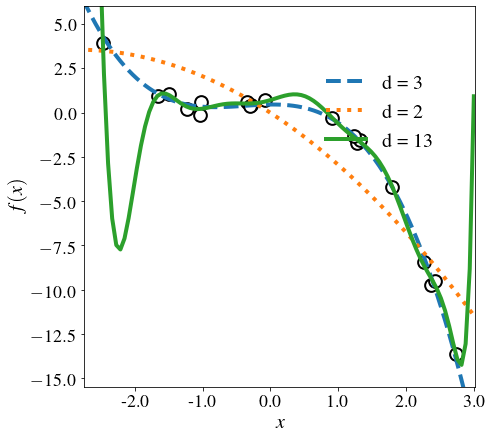

In [53]:
fig, ax = plt.subplots(figsize=(7, 7))

plt.scatter(xvals_tr, yvals_tr, marker='o', facecolor='w', edgecolor='k', lw=2, s=162)

plt.plot(xvals, yvals_3, lw=4, ls = '--', label='d = 3')
plt.plot(xvals, yvals_2, lw=4, ls = ':', label='d = 2')
plt.plot(xvals, yvals_13, lw=4, ls = '-', label='d = 13')

plt.ylim([-15.5, 6.])
plt.xlim(-2.75, 3.01)
# xticks
majorLocator = MultipleLocator(1)
majorFormatter = FormatStrFormatter('%.1f')
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)
ax.tick_params(labelsize=18)

# yticks
majorLocator = MultipleLocator(10.)
majorFormatter = FormatStrFormatter('%.1f')
#ax.yaxis.set_major_locator(majorLocator)
#ax.yaxis.set_major_formatter(majorFormatter)

# Labels
plt.xlabel("$x$")
plt.ylabel("$f(x)$")

# Legend
lg = plt.legend(loc=(0.6, 0.6), frameon=False)
plt.savefig('../poly/figures/generalisation/overfit_regr.pdf', bbox_inches='tight')

## ROC curves

In [54]:
from sklearn import datasets, model_selection, metrics

In [56]:
import pandas as pd
data = pd.read_csv('../data/winequality-white.csv', sep=";")

In [68]:
X = data[data.columns[:-1]].values
y = data['quality'].values
y = np.where(y<6, 0, 1)

In [69]:
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=0.3)

In [70]:
from sklearn import ensemble
clf = ensemble.RandomForestClassifier(n_estimators=50)

In [71]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [72]:
ypred = clf.predict_proba(X_test)
fpr, tpr, thr = metrics.roc_curve(y_test, ypred[:, 1])
prec, rec, thr = metrics.precision_recall_curve(y_test, ypred[:, 1])

In [73]:
from sklearn import linear_model
clf1 = linear_model.RidgeClassifier(fit_intercept=True)

In [74]:
clf1.fit(X_train, y_train)
ypred1 = clf1.decision_function(X_test)
fpr1, tpr1, thr1 = metrics.roc_curve(y_test, ypred1)
prec1, rec1, thr1 = metrics.precision_recall_curve(y_test, ypred1)

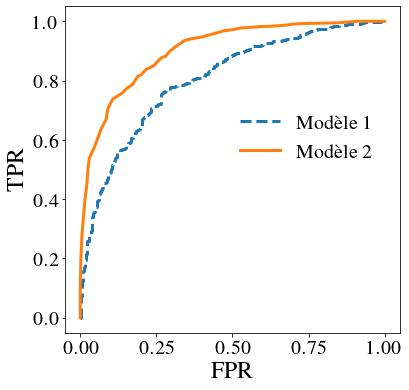

In [78]:
fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(fpr1, tpr1, lw=3, ls='--', label=u'Mod\`ele 1')
plt.plot(fpr, tpr, lw=3, label=u'Mod\`ele 2')

plt.xlabel("FPR", fontsize=24)
plt.ylabel("TPR", fontsize=24)

l = plt.legend(loc=(0.5, 0.5), frameon=False)#, fontsize=20)
plt.savefig('../poly/figures/generalisation/roc_curve.pdf', bbox_inches='tight')

## Regularisation paths

### UCI Crime data

In [4]:
# read in the dataset
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'

In [5]:
# if not behind proxy
crime = pd.read_csv(url, header=None, na_values=['?'])

In [6]:
crime.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [7]:
# remove categorical features
crime.drop([0, 1, 2, 3, 4], axis=1, inplace=True)

In [8]:
# remove rows with any missing values
crime.dropna(inplace=True)

In [9]:
# only keep first 12 variables
X = crime.iloc[:, 0:12]
y = crime[123]

In [10]:
X = np.array(X)
y = np.array(y)
print(type(X))

<class 'numpy.ndarray'>


In [11]:
X_train = X[:200, :]
y_train = y[:200]
X_test = X[200:, :]
y_test = y[200:]

### Ridge

In [12]:
n_alphas = 200
alphas = np.logspace(-2, 2, n_alphas)

In [13]:
from sklearn import linear_model

In [14]:
ridge = linear_model.Ridge(normalize=True)

In [15]:
coefs = []
errors = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    errors.append(np.mean((ridge.predict(X_test) - y_test) ** 2))

In [16]:
cmap=plt.get_cmap('Paired')
my_colors = [cmap(i) for i in np.linspace(0, 1, 12)]

In [17]:
my_lws = list(np.tile([1, 2, 3], 4))
my_lss = list(np.tile(['-', '--', '-.', ':'], 3))

In [18]:
# without colors
plt.rcParams['axes.prop_cycle'] = ("cycler('lw', %s) + "
                                   "cycler('ls', %s)" % (my_lws, 
                                                         my_lss))

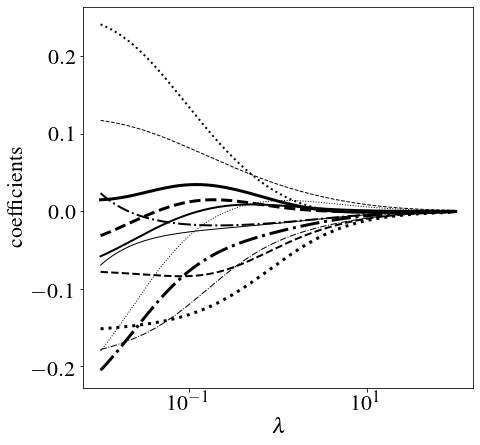

In [23]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)

ax.plot(alphas, coefs)
ax.set_xscale('log')

plt.xlabel('$\lambda$')
plt.ylabel('coefficients')

plt.savefig('../poly/figures/generalisation/ridge_path.pdf', bbox_inches='tight')

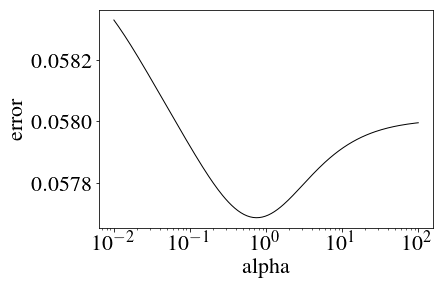

In [26]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

## Lasso 

In [24]:
lasso = linear_model.Lasso(fit_intercept=True, normalize=True)

In [25]:
n_alphas = 5
alphas = np.logspace(-5, -1.5, n_alphas)

In [26]:
coefs_l = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs_l.append(lasso.coef_)

In [27]:
my_lws = list(np.tile([1, 2, 3], 4))
my_lss = list(np.tile(['-', '--', '-.', ':'], 3))

In [28]:
# without colors
plt.rcParams['axes.prop_cycle'] = ("cycler('lw', %s) + "
                                   "cycler('ls', %s)" % (my_lws, 
                                                         my_lss))

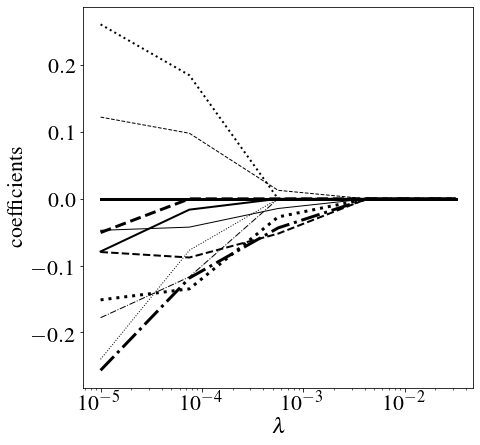

In [30]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)

ax.plot(alphas, coefs_l)
ax.set_xscale('log')

plt.xlabel('$\lambda$')
plt.ylabel('coefficients')

plt.savefig('../poly/figures/generalisation/lasso_path.pdf', bbox_inches='tight')

## Geometry of regularization

In [31]:
X = np.random.random(size=(50, 2))
beta = np.array([-0.5, 2.])
y = np.dot(X, beta) + 0.1*np.random.random(size=(50, ))

In [32]:
def f(b1, b2):
    return np.sum((np.dot(X, np.array([b1, b2]))-y)**2)

In [33]:
a = np.linspace(-3.5, 3.5, 200)
b = np.linspace(-3.5, 3.5, 200)
A, B = np.meshgrid(a, b)

In [34]:
fab = np.array([[f(A[i, j], B[i, j]) for j in range(A.shape[1])] \
    for i in range(A.shape[0])])

In [35]:
np.min(fab)

0.05501171844451049

In [36]:
import matplotlib.patches as patches

### L1 norm

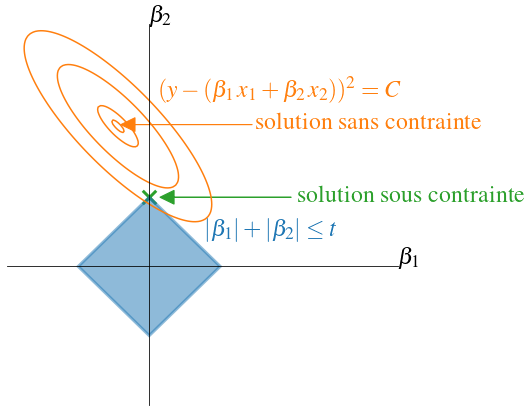

In [42]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)

# Redefine axis range
plt.xlim([-2., 3.5])
plt.ylim([-2., 3.5])

# Move left y-axis and bottom x-axis to centre, passing through (0,0)
ax.spines['left'].set_position(('axes', 2./5.5))
ax.spines['bottom'].set_position(('axes', 2./5.5))

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Ticks
#ax.tick_params(labelsize=16)
plt.xticks([], [])
plt.yticks([], [])

# Axes labels
ax.text(3.5, 0, r'$\beta_1$')
#ax.text(0, 3.5, u'$β_2$', fontsize=20)
ax.text(0, 3.5, r'$\beta_2$')

#plt.contourf(A, B, fab, 20, alpha=.75, cmap=plt.cm.hot)
#C = plt.contour(A, B, fab, 4, colors='black', linewidth=.5)
C = ax.contour(A, B, fab, [0.1, 0.5, 4., 9.5], 
               colors=def_colors[1])
#plt.clabel(C, inline=1, fontsize=10)

r = ax.add_patch(patches.Rectangle((0., -1.), np.sqrt(2), np.sqrt(2), 
                               angle=45., lw=3, 
                                   color=def_colors[0], alpha=0.5))
ax.scatter([0.], [1.], s=182, marker='x', lw=3, color=def_colors[2])

ax.text(0.15, 2.4, r'$(y - (\beta_1 \, x_1 + \beta_2 \, x_2))^2 = C$', 
        color=def_colors[1])
ax.text(0.8, 0.4, r'$|\beta_1|+|\beta_2| \leq t$', 
        color=def_colors[0])

ax.arrow(2, 1, -1.65, -0., head_width=0.2, 
         head_length=0.2, fc=def_colors[2], ec=def_colors[2])
ax.text(2.1, 0.95, 'solution sous contrainte', 
        color=def_colors[2])

ax.arrow(1.45, 2.05, -1.65, -0., head_width=0.2, 
         head_length=0.2, fc=def_colors[1], ec=def_colors[1])
ax.text(1.5, 2., 'solution sans contrainte', 
        color=def_colors[1])
plt.savefig('../poly/figures/generalisation/l1reg.pdf', bbox_inches='tight')

### L2 norm

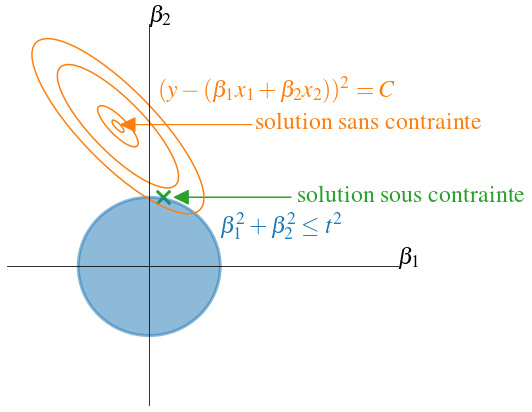

In [41]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)

# Redefine axis range
plt.xlim([-2., 3.5])
plt.ylim([-2., 3.5])

# Move left y-axis and bottom x-axis to centre, passing through (0,0)
ax.spines['left'].set_position(('axes', 2./5.5))
ax.spines['bottom'].set_position(('axes', 2./5.5))

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Ticks
plt.xticks([], [])
plt.yticks([], [])

# Axes labels
ax.text(3.5, 0, r'$\beta_1$')
ax.text(0, 3.5, r'$\beta_2$')


C = ax.contour(A, B, fab, [0.1, 0.5, 4., 8.], 
               colors=def_colors[1])
c = ax.add_patch(patches.Circle((0., 0.), 1., 
                               angle=45., lw=3, 
                               color=def_colors[0], alpha=0.5))

ax.scatter([0.2], [1.], marker='x', lw=3, s=182, color=def_colors[2])

ax.text(0.15, 2.4, r'$(y - (\beta_1 x_1 + \beta_2 x_2))^2 = C$', 
        color=def_colors[1])
ax.text(1., 0.4, r'$\beta_1^2 + \beta_2^2 \leq t^2$', 
        color=def_colors[0])

ax.arrow(2, 1, -1.45, -0., head_width=0.2, 
         head_length=0.2, fc=def_colors[2], ec=def_colors[2])
ax.text(2.1, 0.95, u'solution sous contrainte', 
        color=def_colors[2])

ax.arrow(1.45, 2.05, -1.65, -0., head_width=0.2, 
         head_length=0.2, fc=def_colors[1], ec=def_colors[1])
ax.text(1.5, 2., u'solution sans contrainte', 
        color=def_colors[1])
plt.savefig('../poly/figures/generalisation/l2reg.pdf', bbox_inches='tight')